In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import os
from tqdm.notebook import tqdm
import re
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.1 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('/content/Symptom2Disease.csv')
df.head(30)

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
5,Psoriasis,The skin on my palms and soles is thickened an...
6,Psoriasis,"The skin around my mouth, nose, and eyes is re..."
7,Psoriasis,My skin is very sensitive and reacts easily to...
8,Psoriasis,I have noticed a sudden peeling of skin at dif...
9,Psoriasis,The skin on my genitals is red and inflamed. I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1816 non-null   object
 1   text    1816 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [ ]:
df['label'].value_counts()

Unknown                            273
Migraine                            50
Muscle Spasm                        50
Diarrhea                            50
diabetes                            50
peptic ulcer disease                50
drug reaction                       50
gastroesophageal reflux disease     50
allergy                             50
urinary tract infection             50
Varicose Veins                      50
Jaundice                            50
Cervical spondylosis                50
Psoriasis                           50
Hypertension                        50
Fungal infection                    50
Typhoid                             50
Chicken pox                         50
Bronchial Asthma                    50
Impetigo                            50
Dengue                              50
Malaria                             50
Common Cold                         50
Pneumonia                           50
Dimorphic Hemorrhoids               50
Arthritis                

In [ ]:
int2label = {}

for i, disease in enumerate(df['label'].unique()):
    int2label[i] = disease

label2int = {v : k for k, v in int2label.items()}
num_classes = len(int2label)

int2label, label2int

({0: 'Psoriasis',
  1: 'Varicose Veins',
  2: 'Typhoid',
  3: 'Chicken pox',
  4: 'Impetigo',
  5: 'Dengue',
  6: 'Fungal infection',
  7: 'Common Cold',
  8: 'Pneumonia',
  9: 'Dimorphic Hemorrhoids',
  10: 'Arthritis',
  11: 'Acne',
  12: 'Bronchial Asthma',
  13: 'Hypertension',
  14: 'Migraine',
  15: 'Cervical spondylosis',
  16: 'Jaundice',
  17: 'Malaria',
  18: 'urinary tract infection',
  19: 'allergy',
  20: 'gastroesophageal reflux disease',
  21: 'drug reaction',
  22: 'peptic ulcer disease',
  23: 'diabetes',
  24: 'Cold Sores',
  25: 'Constipation',
  26: 'Dental Abscess',
  27: 'Diarrhea',
  28: 'Hemorrhoids',
  29: 'Insomnia',
  30: 'Muscle Spasm',
  31: 'Nausea/Vomiting',
  32: 'greeting',
  33: 'Unknown'},
 {'Psoriasis': 0,
  'Varicose Veins': 1,
  'Typhoid': 2,
  'Chicken pox': 3,
  'Impetigo': 4,
  'Dengue': 5,
  'Fungal infection': 6,
  'Common Cold': 7,
  'Pneumonia': 8,
  'Dimorphic Hemorrhoids': 9,
  'Arthritis': 10,
  'Acne': 11,
  'Bronchial Asthma': 12,
  'Hy

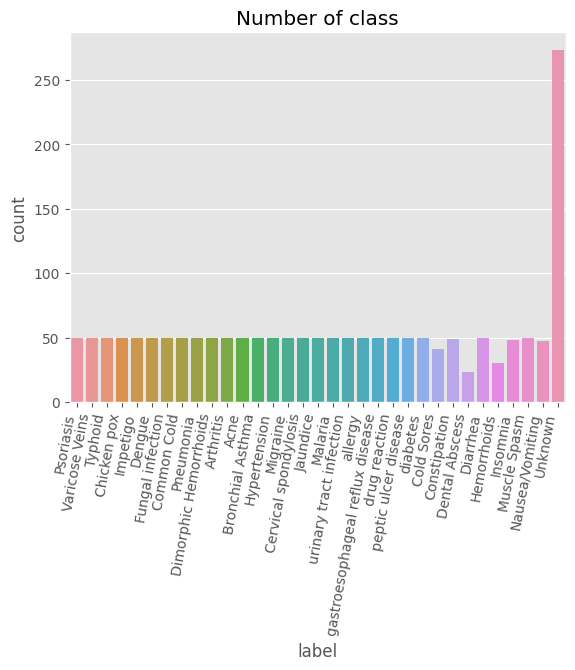

In [5]:
chart = sns.countplot(x = df.label)
plt.title("Number of class")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80, horizontalalignment='right');

In [ ]:
import re
def preprocessing(text):
    text_without_tags = re.sub(r'<[^>]+>', ' ', text)
    letters_only = re.sub('[^a-zA-Z]', ' ', text_without_tags)
    words = letters_only.lower().split()
    return ' '.join(words)

df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(preprocessing)

In [ ]:
df['text'][150]

'i ve been experiencing intense itching all over my skin and it s driving me crazy i also have a rash that s red and inflamed'

  0%|          | 0/1816 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Distribution of description length')

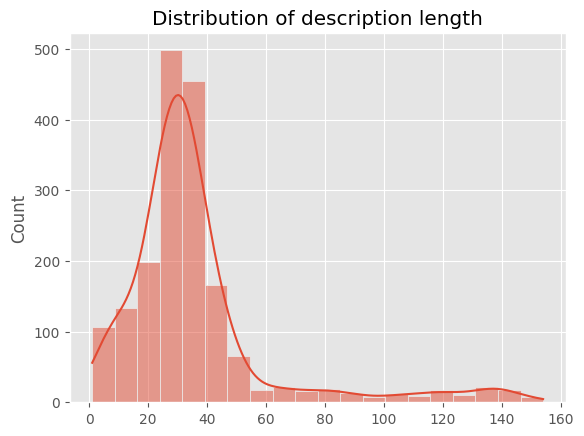

In [ ]:
length = []
for txt in tqdm(df['text'].values):
    length.append(len(txt.split()))

sea.histplot(length, kde = True, bins = 20)
plt.title('Distribution of description length')

In [ ]:
df['label'] = df['label'].map(lambda x : label2int[x])

X, y = df['text'].values, df['label'].values
x_tokenizer = Tokenizer(filters = '')
x_tokenizer.fit_on_texts(X)
x_vocab = len(x_tokenizer.word_index) + 1
print("X vocab:", x_vocab)

X vocab: 4254


In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.1, stratify = y)
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((1634,), (182,), (1634,), (182,))

In [ ]:
train_y[10]

15

In [ ]:
from transformers import AutoTokenizer
BATCH_SIZE = 8

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
train_encodings = tokenizer(list(train_x), padding="max_length", truncation=True)
val_encodings = tokenizer(list(val_x), padding="max_length", truncation=True)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_y
)).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_y
)).batch(BATCH_SIZE)

In [ ]:
num_classes = 34

from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(
    "bert-base-cased",
    num_labels = num_classes,
    id2label = int2label,
    label2id = label2int,
    output_attentions = True)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate = 3e-5),
    metrics = ['accuracy'])

model

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  26146     
                                                                 
Total params: 108336418 (413.27 MB)
Trainable params: 108336418 (413.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
EPOCHS = 5
history = model.fit(train_dataset,
          epochs = EPOCHS,
          validation_data = val_dataset)

Epoch 1/5
205/205 [==============================] - 241s 954ms/step - loss: 2.7066 - accuracy: 0.3415 - val_loss: 1.8231 - val_accuracy: 0.6484
Epoch 2/5
205/205 [==============================] - 190s 927ms/step - loss: 1.3301 - accuracy: 0.7583 - val_loss: 0.9695 - val_accuracy: 0.7802
Epoch 3/5
205/205 [==============================] - 194s 946ms/step - loss: 0.6116 - accuracy: 0.9259 - val_loss: 0.5640 - val_accuracy: 0.8791
Epoch 4/5
205/205 [==============================] - 197s 960ms/step - loss: 0.2648 - accuracy: 0.9798 - val_loss: 0.3278 - val_accuracy: 0.9341
Epoch 5/5
205/205 [==============================] - 194s 947ms/step - loss: 0.1412 - accuracy: 0.9878 - val_loss: 0.3637 - val_accuracy: 0.9176


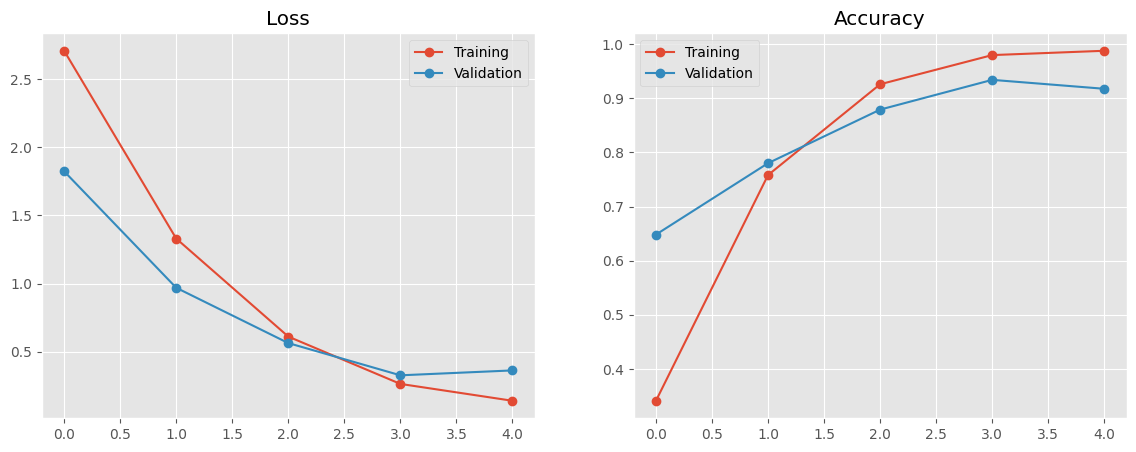

In [ ]:
plt.figure(figsize = (14, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], marker = 'o', label = 'Training')
plt.plot(history.history['val_loss'], marker='o', label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], marker = 'o', label = 'Training')
plt.plot(history.history['val_accuracy'], marker='o', label = 'Validation')
plt.legend()

In [ ]:
model_save_path = "/content/"
model.save_pretrained(model_save_path)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')
# from transformers import TextClassificationPipeline
# from transformers import TFAutoModelForSequenceClassification
# from keras.preprocessing.text import Tokenizer
# from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
# model_load_path = "/content/"
# loaded_model = TFAutoModelForSequenceClassification.from_pretrained(model_load_path)
# pipe = TextClassificationPipeline(model=loaded_model, tokenizer=tokenizer, top_k = 33)
# pred1 = pipe("hi")
# print(pred1[0][:2])

Some layers from the model checkpoint at /content/ were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


[{'label': 'Psoriasis', 'score': 0.154204323887825}, {'label': 'diabetes', 'score': 0.12194536626338959}]
